# Sheet 10: Solution

In [4]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=6,repr.plot.height=5) # this is just to render graphics as png and not as svg, and to adjust the default size

While on Sheet 2 in Ex 3 and 4, we used data that was sampled from a mixture model for classification, here we deal with the problem of inference of a mixture model from data.

## Exercise 1

a) Naive Bayes assumes univariate Gaussians, whereas GMMs allow for multivariate Gaussians.

b) Let us analyze the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park using mixture models. 

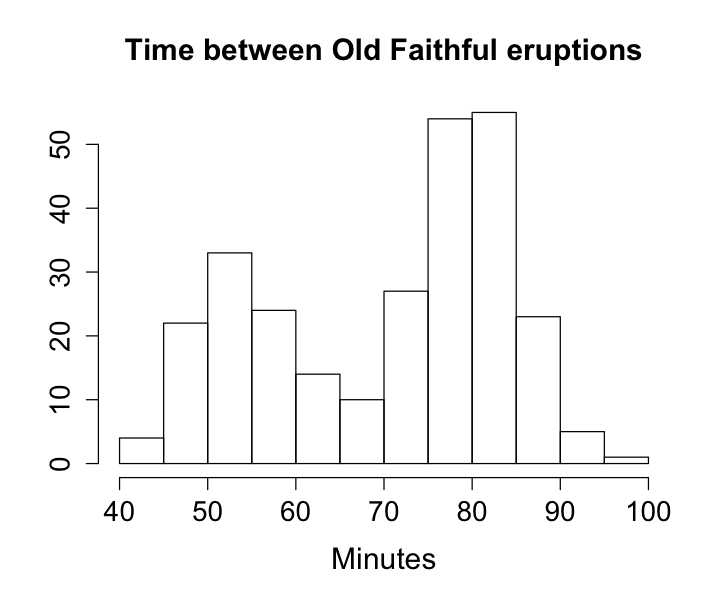

In [5]:
library(mixtools)
# waiting time in minutes
wait = faithful$waiting
# write.csv(wait,'wait.csv')
# let's plot a histogram for that and a kernel density estimate
hist(wait, main="Time between Old Faithful eruptions",
     xlab="Minutes",  ylab="", cex.main=1.5, cex.lab=1.5, cex.axis=1.4)

number of iterations= 9 


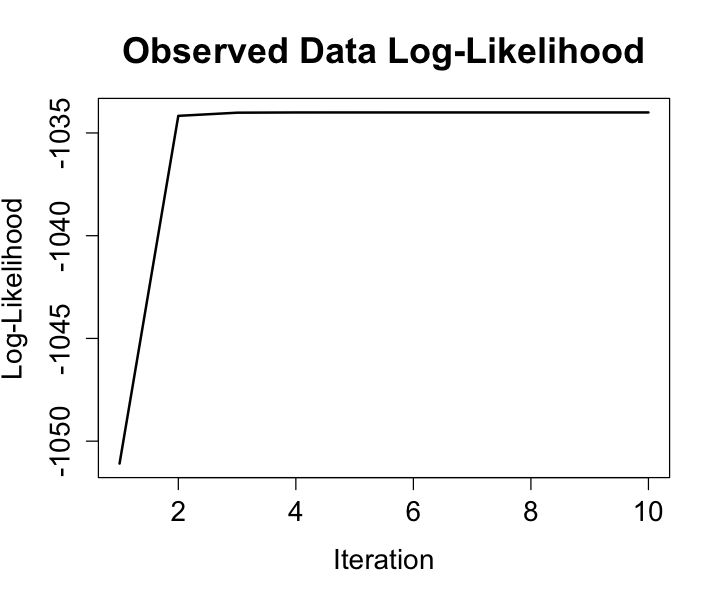

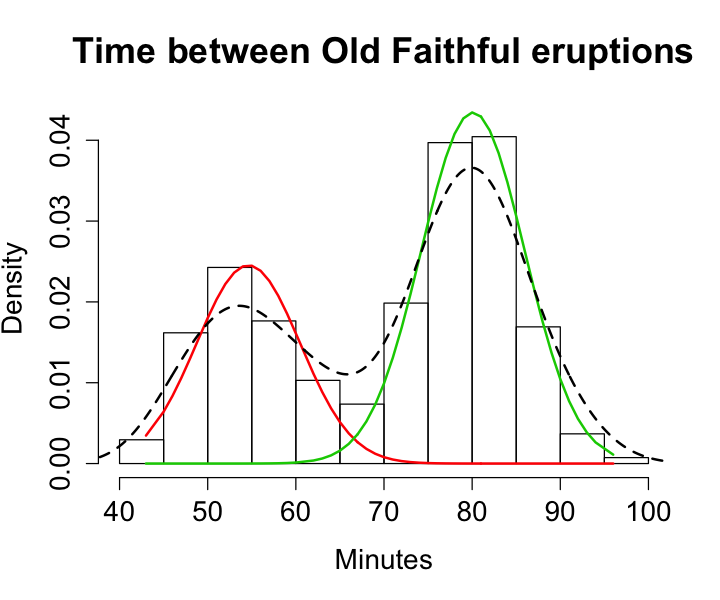

In [6]:
# Now fit a mixture model with two components
# init weights lambda, means mu, and standard deviations sigma
mixmdl <- normalmixEM(wait, lambda = .5, mu = c(55, 80), sigma = 5)
# plot the output, that is convergence of the EM and the computed densities
plot(mixmdl, density=TRUE, cex.axis=1.4, cex.lab=1.4, cex.main=1.8,
     main2="Time between Old Faithful eruptions", xlab2="Minutes")
# compare this with a kernel density estimate of the waiting time distribution
lines(density(wait), lty=2, lwd=2)

In [5]:
# Output the estimator
summary(mixmdl)
# you could also use this command mixmdl[c("lambda", "mu", "sigma")]

summary of normalmixEM object:
         comp 1   comp 2
lambda  0.36085  0.63915
mu     54.61364 80.09031
sigma   5.86909  5.86909
loglik at estimate:  -1034.002 


## Exercise 2

The following is adapted from http://michael.hahsler.net/SMU/EMIS7332/R/chap8.html, where there a few more clustering techniques are described.

x,y
4,53
5,63
10,59
9,77
13,49
13,69


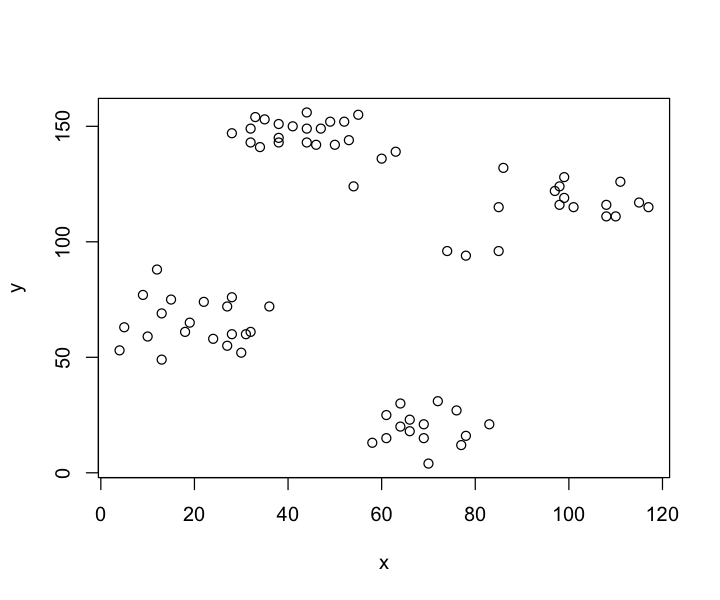

In [26]:
library(cluster)
data(ruspini, package="cluster")
head(ruspini)
write.csv(ruspini,'ruspini.csv')
ruspini <- ruspini[sample(1:nrow(ruspini)),]
plot(ruspini)

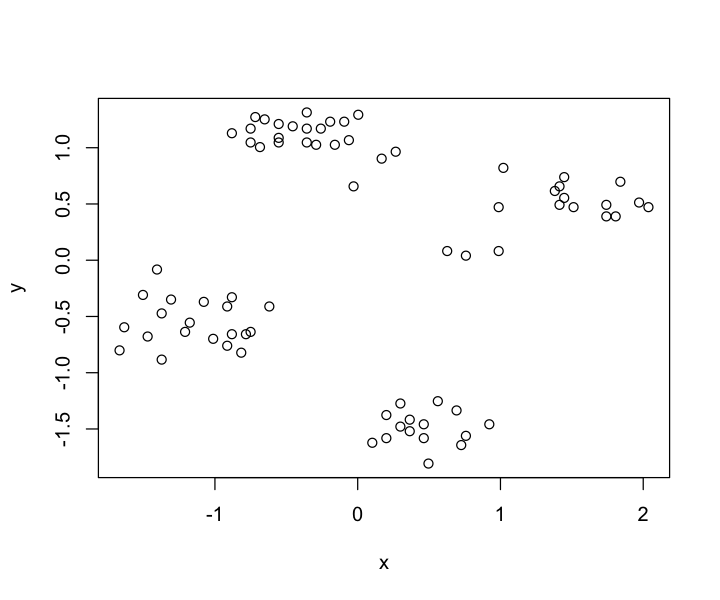

In [8]:
# normalize the data
ruspini_scaled <- scale(ruspini)
plot(ruspini_scaled)

### 2a) Use k means clustering

In [9]:
km <- kmeans(ruspini_scaled, centers=4, nstart=10)
km

K-means clustering with 4 clusters of sizes 15, 17, 20, 23

Cluster means:
           x          y
1  0.4607268 -1.4912271
2  1.4194387  0.4692907
3 -1.1385941 -0.5559591
4 -0.3595425  1.1091151

Clustering vector:
 2 45 56 13 38 69  9  4  6 50 24 67 30 39 36 11 37 70 63 16 27 26 43 23 21 22 
 3  2  2  3  4  1  3  3  3  2  4  1  4  4  4  3  4  1  1  3  4  4  4  4  4  4 
41 20 52 66 73  5 47 68  8 28 17 61 29 55 35 18  3 46 72 65 40 32 19 57 25 44 
 4  3  2  1  1  3  2  1  3  4  3  1  4  2  4  3  3  2  1  1  4  4  3  2  4  2 
75 58 60 12 53 34 10 14 51 42  1 48 15 64 31  7 33 71 49 74 62 59 54 
 1  2  2  3  2  4  3  3  2  4  3  2  3  1  4  3  4  1  2  1  1  2  2 

Within cluster sum of squares by cluster:
[1] 1.082373 3.641276 2.705477 2.658679
 (between_SS / total_SS =  93.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

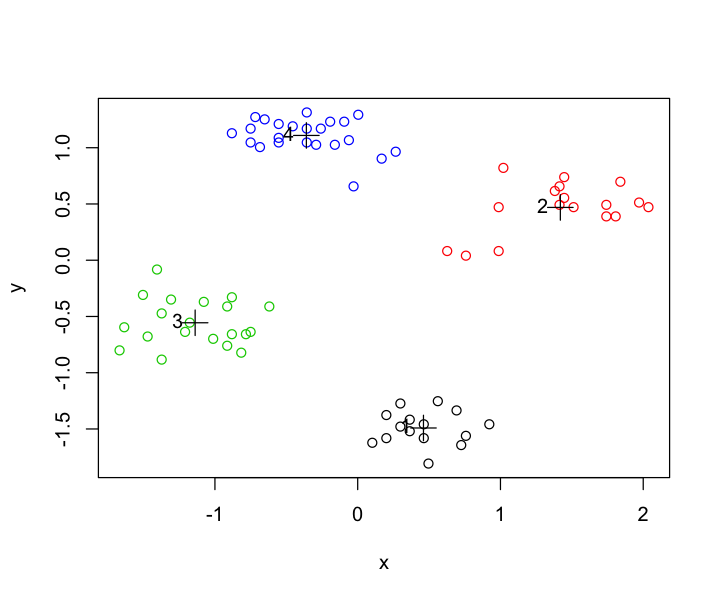

In [10]:
plot(ruspini_scaled, col=km$cluster)
points(km$centers, pch=3, cex=2) # this adds the centroids
text(km$centers, labels=1:4, pos=2) # this adds the cluster ID

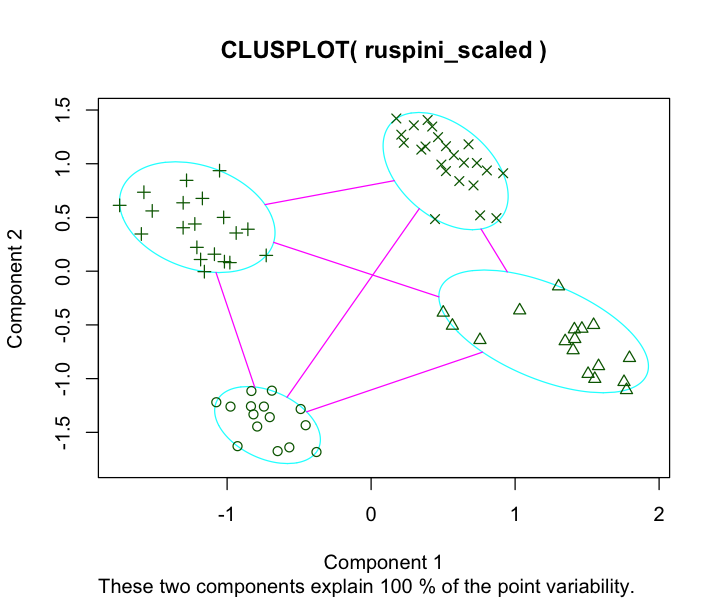

In [11]:
# alternative plot from the package "cluster", which uses principal component analysis in more than two dimensions
clusplot(ruspini_scaled, km$cluster)

,x,y
1,0.4607268,-1.4912271
2,1.4194387,0.4692907
3,-1.1385941,-0.5559591
4,-0.3595425,1.1091151


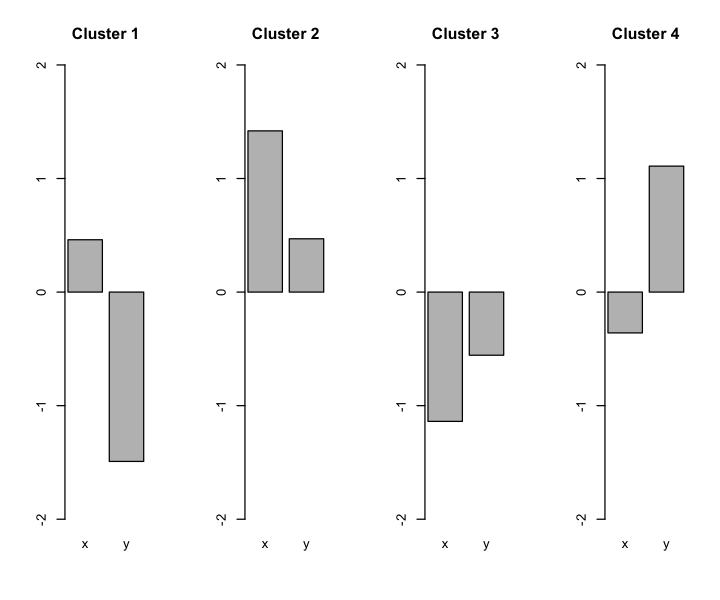

In [13]:
# visualize the centers
km$centers
def.par <- par(no.readonly = TRUE) # save default, for resetting...
layout(t(1:4)) # 4 plots in one
for(i in 1:4) barplot(km$centers[i,], ylim=c(-2,2), main=paste("Cluster", i))

,x,y
47,0.75796992,0.04051801
46,0.98745908,0.08158356
45,0.9874591,0.4717063
51,1.4136532,0.6565013
50,1.4136532,0.4922391
57,1.7414949,0.4922391


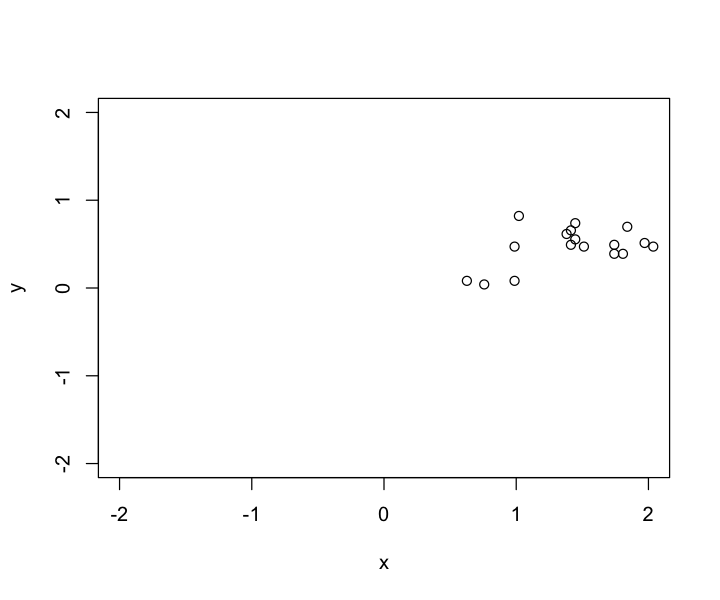

In [50]:
par(def.par)  #- reset to default
# Find data for a single cluster
# All you need is to select the rows corresponding to the cluster. The next example plots all data points of cluster 1
cluster1 <- ruspini_scaled[km$cluster==1,]
head(cluster1)
plot(cluster1, xlim = c(-2,2), ylim = c(-2,2))

### 2b Use Gaussian Mixture Models to cluster

In [18]:
library(mclust)

Package 'mclust' version 5.3
Type 'citation("mclust")' for citing this R package in publications.


In [19]:
# Mclust uses Bayesian Information Criterion (BIC) to find the number of clusters.
m <- Mclust(ruspini_scaled)
summary(m)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEI (diagonal, equal volume and shape) model with 5 components:

 log.likelihood  n df       BIC       ICL
      -91.26485 75 16 -251.6095 -251.7486

Clustering table:
 1  2  3  4  5 
20  3 14 23 15 

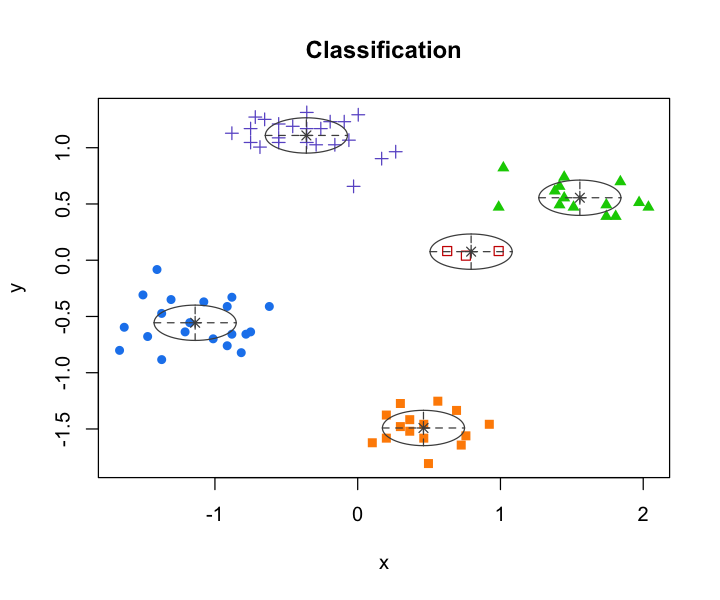

In [20]:
plot(m, what = "classification")

In [21]:
# rerun with a fixed number of clusters
m <- Mclust(ruspini_scaled, G=4)
summary(m)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEI (diagonal, equal volume and shape) model with 4 components:

 log.likelihood  n df       BIC       ICL
      -101.6027 75 13 -259.3327 -259.3356

Clustering table:
 1  2  3  4 
20 17 23 15 

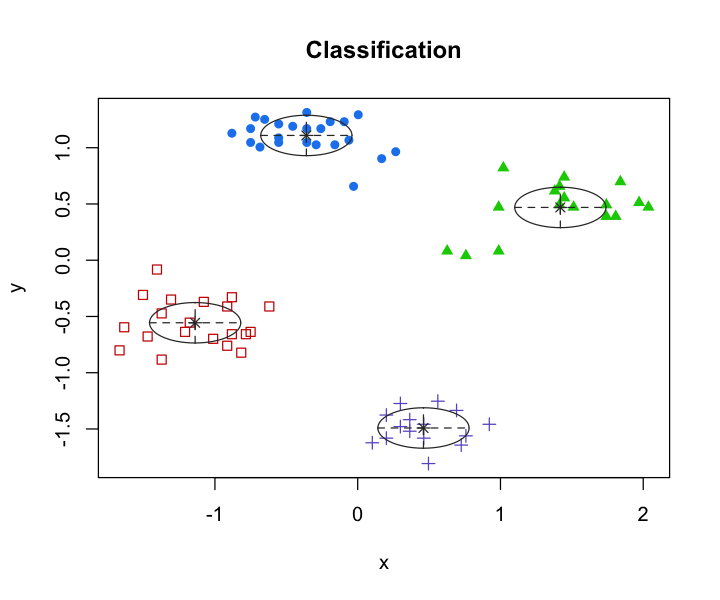

In [58]:
plot(m, what = "classification")

## Exercise 3

Compare k means and GMM clustering for an example where the data does not clearly separate. It is then clear that the information that k means provides is too naive. There will be no way to strictly assign a point to a cluster. The posterior distribution provided by a GMM resolves this problem

In [22]:
set.seed(100)
x.1 <- rmvnorm(40, c(0, 0))
x.2 <- rmvnorm(60, c(2, 1))
X <- rbind(x.1, x.2)

K-means clustering with 2 clusters of sizes 52, 48

Cluster means:
        [,1]      [,2]
1  2.1146077 1.2486616
2 -0.1323613 0.2680975

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 58.39905 84.10825
 (between_SS / total_SS =  51.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

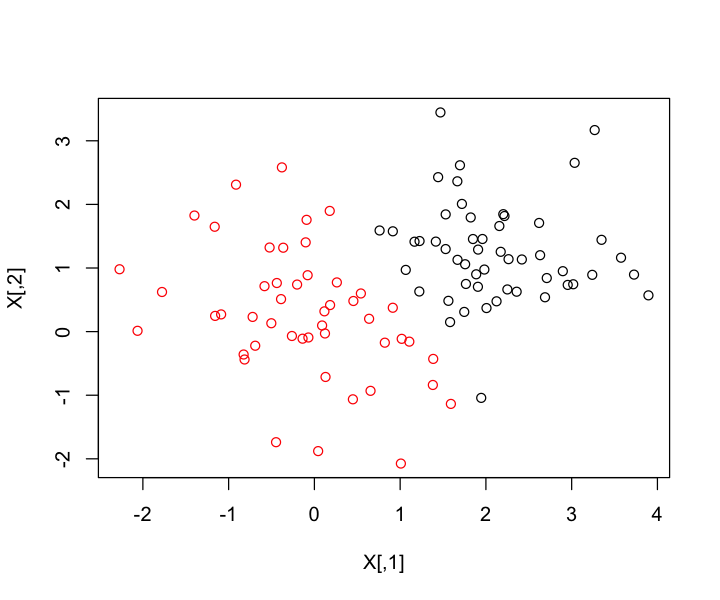

In [23]:
# perform k means clustering on the data, the output can't be trusted
km <- kmeans(X, centers=2, nstart=10)
km
plot(X, col=km$cluster)

number of iterations= 16 


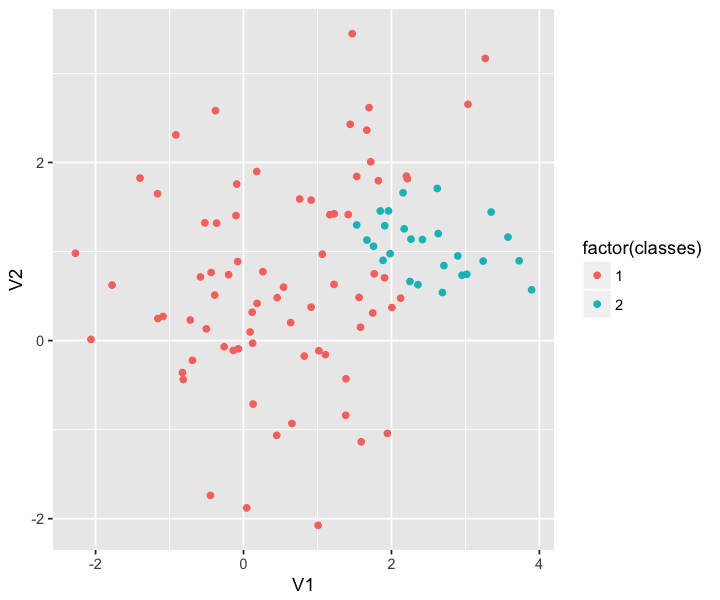

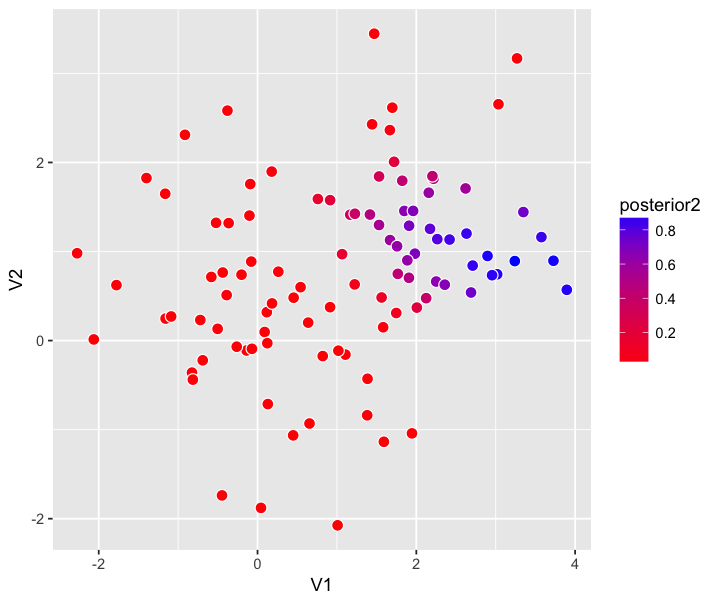

In [24]:
# perform GMM clustering on the data

library(ggplot2)
data_f <- as.data.frame(X)

# fit gaussian mixture model
data_f.k2 = mvnormalmixEM(as.matrix(data_f), k=2, maxit=100, epsilon=0.01) 

# maximum a posteriori estimations per observation
# this hard assignment does not do better than k means clustering
classes <- apply(data_f.k2$posterior,1,which.max)
ggplot(data=data_f,aes(x=V1, y=V2)) +  
  geom_point( aes(colour=factor(classes)))

# plot the posterior instead
data_f$posterior2 <- data_f.k2$posterior[,'comp.2']  
ggplot(data=data_f,aes(x=V1, y=V2)) +  
  geom_point(aes(fill=posterior2), colour="white", shape=21, size=3) +
  scale_fill_gradient ('posterior2', low = "red", high = "blue")